In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import joblib
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


###Load dataset

In [ ]:
path_file = '/content/drive/MyDrive/ML_Project/heart_disease_health_indicators_BRFSS2015.csv'
data = pd.read_csv(path_file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

###Show data information

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


###Show Boxplot


(253680, 22)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


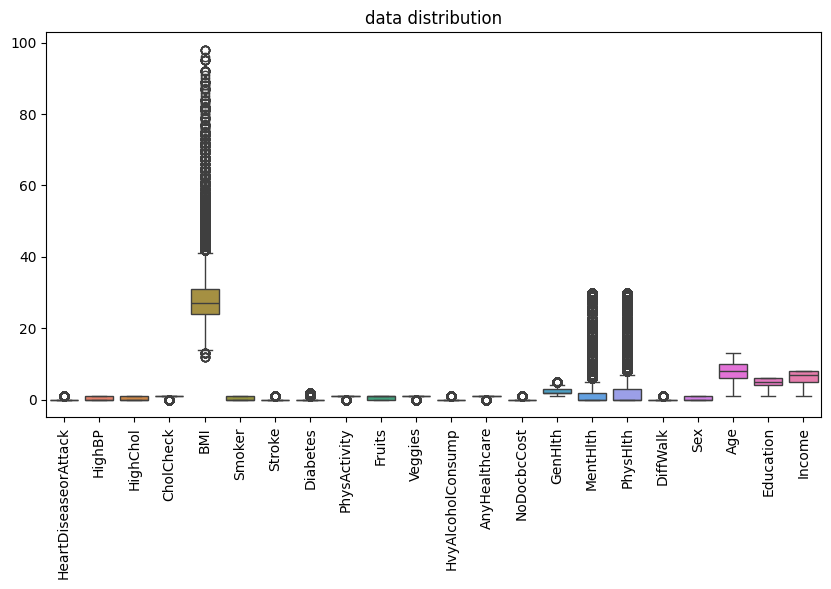

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data)
print(data.shape)
l=list(np.arange(22))
print(l)
plt.title("data distribution")
plt.xticks(l, list(data.columns),rotation=90)
plt.show()

###Check data is null

In [ ]:
data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
positive_samples = data[data['HeartDiseaseorAttack'] == 1]
negative_samples = data[data['HeartDiseaseorAttack'] == 0]
print(positive_samples.shape)
print(negative_samples.shape)

(23893, 22)
(229787, 22)


###Balancing data by min of samples

In [ ]:
num_samples = min(len(positive_samples), len(negative_samples))
balanced_df = pd.concat([positive_samples.sample(num_samples, random_state=42),
                         negative_samples.sample(num_samples, random_state=42)])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47786 entries, 0 to 47785
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  47786 non-null  float64
 1   HighBP                47786 non-null  float64
 2   HighChol              47786 non-null  float64
 3   CholCheck             47786 non-null  float64
 4   BMI                   47786 non-null  float64
 5   Smoker                47786 non-null  float64
 6   Stroke                47786 non-null  float64
 7   Diabetes              47786 non-null  float64
 8   PhysActivity          47786 non-null  float64
 9   Fruits                47786 non-null  float64
 10  Veggies               47786 non-null  float64
 11  HvyAlcoholConsump     47786 non-null  float64
 12  AnyHealthcare         47786 non-null  float64
 13  NoDocbcCost           47786 non-null  float64
 14  GenHlth               47786 non-null  float64
 15  MentHlth           

###Show Correlation Matrix

In [ ]:
cor_matrix = balanced_df.corr().abs()
cor_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.364239,0.308358,0.092449,0.094998,0.198257,0.232944,0.255236,0.146737,0.028954,...,0.036754,0.051422,0.412242,0.097691,0.259382,0.305820,0.143222,0.397378,0.166856,0.232694
HighBP,0.364239,1.000000,0.337195,0.101657,0.200589,0.116776,0.147840,0.274048,0.132134,0.040588,...,0.041871,0.028611,0.325630,0.070610,0.183604,0.245356,0.061438,0.343004,0.150687,0.192534
HighChol,0.308358,0.337195,1.000000,0.096678,0.104464,0.120892,0.103483,0.207285,0.080939,0.039141,...,0.038389,0.022908,0.229497,0.069562,0.130212,0.155512,0.052690,0.259956,0.077533,0.101636
CholCheck,0.092449,0.101657,0.096678,1.000000,0.038120,0.002511,0.025734,0.066107,0.001707,0.015404,...,0.128288,0.063246,0.060790,0.004746,0.035348,0.047588,0.002734,0.107263,0.006918,0.005467
BMI,0.094998,0.200589,0.104464,0.038120,1.000000,0.013364,0.023782,0.241843,0.146075,0.075584,...,0.019576,0.057001,0.210911,0.088545,0.135287,0.206986,0.026822,0.059122,0.080790,0.101420
Smoker,0.198257,0.116776,0.120892,0.002511,0.013364,1.000000,0.074424,0.076557,0.094868,0.087961,...,0.024954,0.047415,0.193841,0.088389,0.126853,0.134567,0.126398,0.118844,0.163535,0.133002
Stroke,0.232944,0.147840,0.103483,0.025734,0.023782,0.074424,1.000000,0.135378,0.093585,0.016220,...,0.006873,0.066663,0.226008,0.103041,0.186936,0.221123,0.002465,0.127710,0.104368,0.173161
Diabetes,0.255236,0.274048,0.207285,0.066107,0.241843,0.076557,0.135378,1.000000,0.138934,0.042257,...,0.018634,0.036036,0.318909,0.091154,0.201404,0.254196,0.045100,0.169429,0.130928,0.186280
PhysActivity,0.146737,0.132134,0.080939,0.001707,0.146075,0.094868,0.093585,0.138934,1.000000,0.131275,...,0.030954,0.067223,0.286308,0.141601,0.251005,0.291289,0.053192,0.103803,0.198612,0.213861
Fruits,0.028954,0.040588,0.039141,0.015404,0.075584,0.087961,0.016220,0.042257,0.131275,1.000000,...,0.035397,0.047419,0.090797,0.066304,0.047163,0.048662,0.084772,0.071422,0.111478,0.083841


###Extract the upper triangular part of the correlation matrix.

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
upper_tri

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,NaN,0.364239,0.308358,0.092449,0.094998,0.198257,0.232944,0.255236,0.146737,0.028954,...,0.036754,0.051422,0.412242,0.097691,0.259382,0.305820,0.143222,0.397378,0.166856,0.232694
HighBP,NaN,NaN,0.337195,0.101657,0.200589,0.116776,0.147840,0.274048,0.132134,0.040588,...,0.041871,0.028611,0.325630,0.070610,0.183604,0.245356,0.061438,0.343004,0.150687,0.192534
HighChol,NaN,NaN,NaN,0.096678,0.104464,0.120892,0.103483,0.207285,0.080939,0.039141,...,0.038389,0.022908,0.229497,0.069562,0.130212,0.155512,0.052690,0.259956,0.077533,0.101636
CholCheck,NaN,NaN,NaN,NaN,0.038120,0.002511,0.025734,0.066107,0.001707,0.015404,...,0.128288,0.063246,0.060790,0.004746,0.035348,0.047588,0.002734,0.107263,0.006918,0.005467
BMI,NaN,NaN,NaN,NaN,NaN,0.013364,0.023782,0.241843,0.146075,0.075584,...,0.019576,0.057001,0.210911,0.088545,0.135287,0.206986,0.026822,0.059122,0.080790,0.101420
Smoker,NaN,NaN,NaN,NaN,NaN,NaN,0.074424,0.076557,0.094868,0.087961,...,0.024954,0.047415,0.193841,0.088389,0.126853,0.134567,0.126398,0.118844,0.163535,0.133002
Stroke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135378,0.093585,0.016220,...,0.006873,0.066663,0.226008,0.103041,0.186936,0.221123,0.002465,0.127710,0.104368,0.173161
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.138934,0.042257,...,0.018634,0.036036,0.318909,0.091154,0.201404,0.254196,0.045100,0.169429,0.130928,0.186280
PhysActivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131275,...,0.030954,0.067223,0.286308,0.141601,0.251005,0.291289,0.053192,0.103803,0.198612,0.213861
Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.035397,0.047419,0.090797,0.066304,0.047163,0.048662,0.084772,0.071422,0.111478,0.083841


###List features that have corr more than 0.7 and add to to_drop list

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
to_drop

[]

###Drop data from to_drop and split target from features

In [ ]:
target = balanced_df['HeartDiseaseorAttack']
features = balanced_df.drop(to_drop, axis=1)
features = balanced_df.drop('HeartDiseaseorAttack',axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47786 entries, 0 to 47785
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighBP             47786 non-null  float64
 1   HighChol           47786 non-null  float64
 2   CholCheck          47786 non-null  float64
 3   BMI                47786 non-null  float64
 4   Smoker             47786 non-null  float64
 5   Stroke             47786 non-null  float64
 6   Diabetes           47786 non-null  float64
 7   PhysActivity       47786 non-null  float64
 8   Fruits             47786 non-null  float64
 9   Veggies            47786 non-null  float64
 10  HvyAlcoholConsump  47786 non-null  float64
 11  AnyHealthcare      47786 non-null  float64
 12  NoDocbcCost        47786 non-null  float64
 13  GenHlth            47786 non-null  float64
 14  MentHlth           47786 non-null  float64
 15  PhysHlth           47786 non-null  float64
 16  DiffWalk           477

--------------------------------------------------------------------

In [ ]:
for feature in features.columns :
  print(f'Value of {feature} features : {np.unique(features[feature])}')

Value of HighBP features : [0. 1.]
Value of HighChol features : [0. 1.]
Value of CholCheck features : [0. 1.]
Value of BMI features : [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 77. 79. 81. 82. 84. 85. 87. 89.
 90. 92. 95. 98.]
Value of Smoker features : [0. 1.]
Value of Stroke features : [0. 1.]
Value of Diabetes features : [0. 1. 2.]
Value of PhysActivity features : [0. 1.]
Value of Fruits features : [0. 1.]
Value of Veggies features : [0. 1.]
Value of HvyAlcoholConsump features : [0. 1.]
Value of AnyHealthcare features : [0. 1.]
Value of NoDocbcCost features : [0. 1.]
Value of GenHlth features : [1. 2. 3. 4. 5.]
Value of MentHlth features : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Value

In [ ]:
features.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

###Select feature that has more correlation with target more than 0.1

In [ ]:
correlation_matrix_with_target = features.corrwith(target)
print(correlation_matrix_with_target.sort_values(ascending=True))
threshold = 0.1
features = features.loc[:, correlation_matrix_with_target > threshold]
print(features.columns.to_list())

Sex         0.143222
Smoker      0.198257
Stroke      0.232944
Diabetes    0.255236
PhysHlth    0.259382
DiffWalk    0.305820
HighChol    0.308358
HighBP      0.364239
Age         0.397378
GenHlth     0.412242
dtype: float64
['HighBP', 'HighChol', 'Smoker', 'Stroke', 'Diabetes', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']


In [ ]:
for feature in features.columns :
  print(f'Value of {feature} features : {np.unique(features[feature])}')

Value of HighBP features : [0. 1.]
Value of HighChol features : [0. 1.]
Value of Smoker features : [0. 1.]
Value of Stroke features : [0. 1.]
Value of Diabetes features : [0. 1. 2.]
Value of GenHlth features : [1. 2. 3. 4. 5.]
Value of PhysHlth features : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
Value of DiffWalk features : [0. 1.]
Value of Sex features : [0. 1.]
Value of Age features : [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


###Scale data with MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features.shape


(47786, 10)

###Show box plot

(47786, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


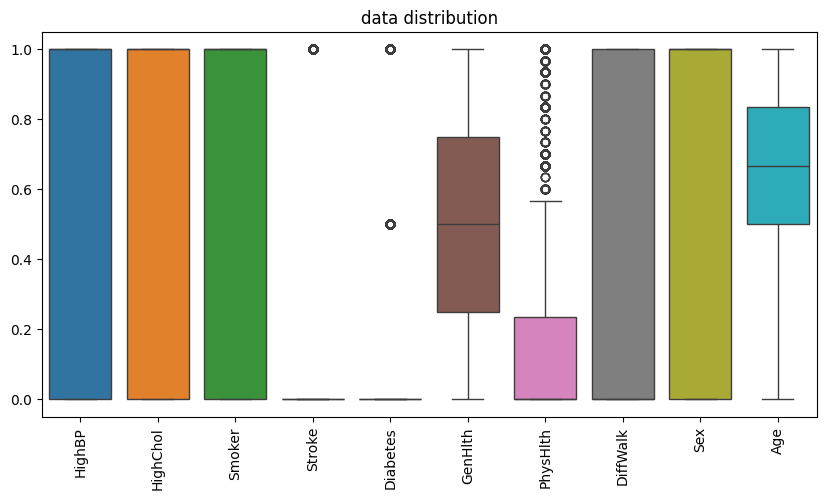

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(scaled_features)
print(features.shape)
l=list(np.arange(10))
print(l)
plt.title("data distribution")
plt.xticks(l, list(features.columns),rotation=90)
plt.show()

###Save scaler for predict user's input

In [ ]:
joblib.dump(scaler, '/content/drive/MyDrive/ML_Project/scaler/scaler.pkl')

['/content/drive/MyDrive/ML_Project/scaler/scaler.pkl']

###Split data to Train data and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,target,stratify=target, test_size=0.2,random_state=101)
X_train.shape

(38228, 10)

##Train Naive Bayes Model


In [ ]:
Gnb = GaussianNB(var_smoothing=1e-9)
Gnb.fit(X_train, y_train)
y_pred = Gnb.predict(X_test)
print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred))

Naive Bayes Classifier Accuracy:  0.730592174094999


##Show Classification Report and Confusion Matrix


----- Classification Report of Naive Bayes predict X_test -----
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      4779
         1.0       0.77      0.66      0.71      4779

    accuracy                           0.73      9558
   macro avg       0.74      0.73      0.73      9558
weighted avg       0.74      0.73      0.73      9558

----- Confusion matrix of Naive Bayes predict X_test -----


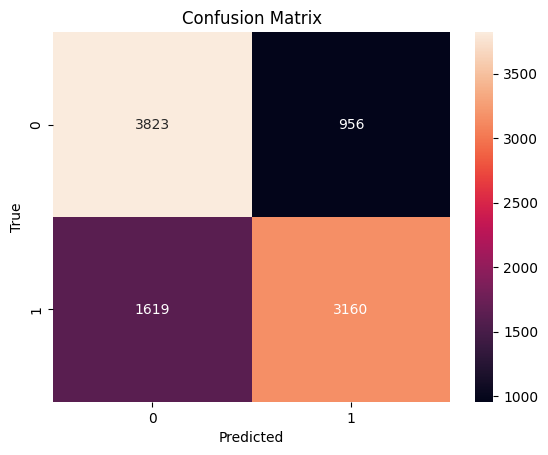

In [ ]:
print('----- Classification Report of Naive Bayes predict X_test -----')
print(classification_report(y_test, y_pred))
print('----- Confusion matrix of Naive Bayes predict X_test -----')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###GridSearchCV for XGBoost Model


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 150, 200]
}
xg = XGBClassifier()
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best accuracy score found:", best_score)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, min_child_weight=1, n_es

#Train with Best Parameter

In [ ]:
xg = XGBClassifier(**best_params)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
y_pred_proba = xg.predict_proba(X_test)
print("XGBClassifier Accuracy: ",accuracy_score(y_test, y_pred))
print(y_pred_proba)

XGBClassifier Accuracy:  0.7713956894747855
[[0.25649095 0.74350905]
 [0.38740522 0.6125948 ]
 [0.83290756 0.16709241]
 ...
 [0.2848776  0.7151224 ]
 [0.7805075  0.2194925 ]
 [0.1635133  0.8364867 ]]


###Show Classification Report and Confusion Matrix


----- Classification Report of Naive Bayes predict X_test -----
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      4779
         1.0       0.75      0.81      0.78      4779

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558

----- Confusion matrix of Naive Bayes predict X_test -----


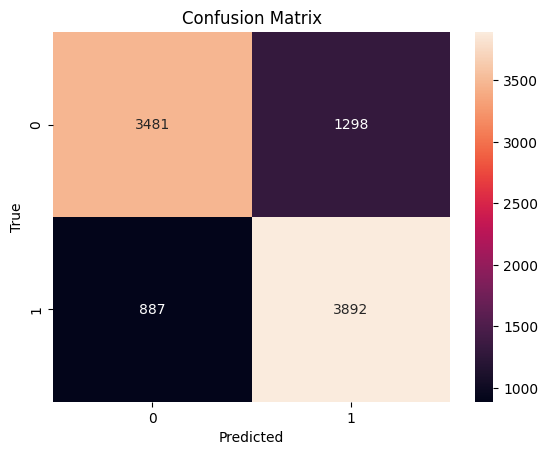

In [ ]:
print('----- Classification Report of XGBoost predict X_test -----')
print(classification_report(y_test, y_pred))
print('----- Confusion matrix of XGBoost predict X_test -----')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Save Trained model


In [ ]:
joblib.dump(xg, '/content/drive/MyDrive/ML_Project/model/XGBoost.pkl')
joblib.dump(Gnb, '/content/drive/MyDrive/ML_Project/model/NaiveBayes.pkl')

['/content/drive/MyDrive/ML_Project/model/NaiveBayes.pkl']